<a href="https://colab.research.google.com/github/moumitabiswas/Currentdata/blob/master/Skin_Type_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import keras
from tensorflow.keras.utils import get_file
from sklearn.metrics import roc_curve, auc, confusion_matrix
from imblearn.metrics import sensitivity_score, specificity_score
from keras import backend as K
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

2.5.0


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os


In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
#number of images in the training set
num_train_samples = 78
#number of images in the evaluation set
num_val_samples = 18
#number of images in every forward/backwards pass
train_batch_size = 5
val_batch_size = 3
#dimensions of the image that will be inputed into the network (224x224)
image_size = 224

# Declare how many steps are needed in an iteration
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

train_steps,val_steps

(16.0, 6.0)

In [ ]:
os.chdir(train_path)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# train_generator = train_datagen.flow_from_directory(
#     directory=r"/content/Train",
#     target_size=(224, 224),
#     color_mode="rgb",
#     batch_size=32,
#     class_mode="categorical",
#     shuffle=True,
#     seed=42
# )

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

In [ ]:
labels = ["dryskin", "oilyskin"]
target_size=(224, 224)
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, target_size) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [ ]:
train_path = '/content/drive/MyDrive/All_Python/Training'
valid_path = '/content/drive/MyDrive/All_Python/Validation'

train = get_data(train_path)
val = get_data(valid_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [ ]:
test_path = '/content/Test'
# test = get_data(test_path)

In [ ]:
# train

In [ ]:
img_size=224
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [ ]:
# opt = Adam(lr=0.000001)
opt = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 300 , validation_data = (x_val, y_val))

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
model_save_name = 'classifier.pt'
path = '/content/gdrive/MyDrive/All_Python'
os.chdir(path)
from tensorflow.keras.models import save_model, load_model
save_model(model,'mymodel.model')
# torch.save(model.state_dict(), path)

INFO:tensorflow:Assets written to: mymodel.model/assets


In [ ]:
# model_path = '/content/gdrive/MyDrive/All_Python/{model_save_name}'
# new_model = 

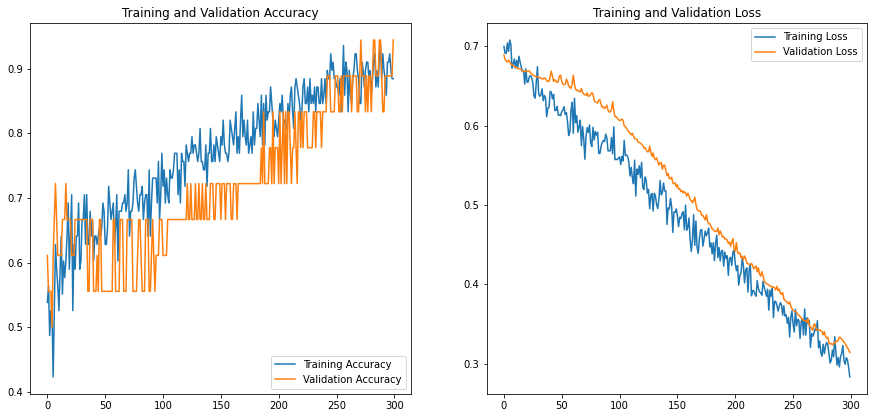

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(300)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(300)
print(acc)

[0.5, 0.5128205418586731, 0.5512820482254028, 0.5128205418586731, 0.5769230723381042, 0.5512820482254028, 0.5641025900840759, 0.5512820482254028, 0.5512820482254028, 0.6025640964508057, 0.6282051205635071, 0.6153846383094788, 0.6025640964508057, 0.6410256624221802, 0.6538461446762085, 0.6538461446762085, 0.6410256624221802, 0.6153846383094788, 0.6538461446762085, 0.6794871687889099, 0.6282051205635071, 0.6282051205635071, 0.6025640964508057, 0.6410256624221802, 0.6794871687889099, 0.6282051205635071, 0.692307710647583, 0.6282051205635071, 0.6538461446762085, 0.6282051205635071, 0.7179487347602844, 0.6666666865348816, 0.6794871687889099, 0.6794871687889099, 0.6410256624221802, 0.6538461446762085, 0.6282051205635071, 0.6666666865348816, 0.7179487347602844, 0.7051281929016113, 0.6794871687889099, 0.6666666865348816, 0.6794871687889099, 0.6666666865348816, 0.7179487347602844, 0.692307710647583, 0.692307710647583, 0.6666666865348816, 0.7051281929016113, 0.7051281929016113, 0.705128192901611

In [ ]:
# !ls /content/gdrive/MyDrive
# import torch
# model_save_name = 'classifier.pt'
# path = F"/content/gdrive/MyDrive/All_Python{model_save_name}" 
# # torch.save(model.state_dict(), path)
# model.save(path)

from keras.models import load_model

# model.save('my_model.h5') 

In [ ]:
# import torch
# model_save_name = 'classifier.pt'

# path = F"/content/gdrive/MyDrive/All_Python{model_save_name}" 

# model = load(path)
# model.eval()

In [ ]:
# x_val

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor



   

In [ ]:
img_path = '/content/drive/MyDrive/All_Python/Test/all_classes/skin-1.jpg'
    # load a single image
new_image = load_image(img_path)

In [ ]:
from IPython.display import Image
from google.colab.patches import cv2_imshow
os.getcwd()
os.chdir('/content/drive/MyDrive/All_Python/Test')
# Image('skin-1.jpg',width=100, height=100) 

from google.colab.patches import cv2_imshow

img = cv2.imread('skin-1.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
 pred_1 = model.predict(new_image)
 print(pred_1)

[[0.5924612  0.40753868]]


In [ ]:
model.predict(new_image)


array([[0.5924612 , 0.40753868]], dtype=float32)

In [ ]:
pred.argmax(axis=1)
pred_1
0.5605247+ 0.4394753

1.0

In [ ]:
pred_dir = '/content/drive/MyDrive/All_Python/Test/'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
        directory=pred_dir,
        target_size=(224,224),
        color_mode="rgb",
        shuffle = False,
        class_mode='binary',
        batch_size=1)



Found 5 images belonging to 2 classes.


In [ ]:
pred=model.predict(test_generator, steps=len(test_generator), verbose=1)

5/5 [==============================] - 0s 28ms/step


In [ ]:
pred

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [2.7893112e-23, 1.0000000e+00],
       [1.4451562e-30, 1.0000000e+00]], dtype=float32)

In [ ]:
cl = np.round(pred)
# Get filenames (set shuffle=false in generator is important)
filenames=test_generator.filenames

In [ ]:
results=pd.DataFrame({"file":filenames,"pr":pred[:,0], "class":cl[:,0]})

In [ ]:
results

,file,pr,class
0,all_classes/skin-1.jpg,0.000000e+00,0.0
1,all_classes/skin-2.jpg,0.000000e+00,0.0
2,all_classes/skin-3.jpg,0.000000e+00,0.0
3,all_classes/skin-4.jpg,2.789311e-23,0.0
4,all_classes/skin-5.jpg,1.445156e-30,0.0


In [ ]:
os.getcwd()
os.chdir('/content/drive/MyDrive/All_Python/Test')